# Customer Churn

---

### Import Modules

In [1]:
# Standard Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Compose
from sklearn.compose import make_column_transformer

# Pipeline
from sklearn.pipeline import make_pipeline

### Read Data

In [2]:
# Read csv

churn_data = pd.read_csv('./data/churn_data.csv')

In [3]:
churn_data.shape

(3333, 21)

In [4]:
# Making a working copy of the original

df = churn_data.copy()

In [5]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Exploratory Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [7]:
# Number of churned customers

df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [8]:
# Analyzing churned v/s non-churned customer differences

df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.449825,8.604561
yes,2.229814,5.115942


In [9]:
df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.163883,13.913125
yes,1.853275,11.860138


In [10]:
# Insights
    # It can be seen above that Churners place more customer 
    # service calls than non-churners, and leave fewer voice
    # mail messages.

In [11]:
# Veiwing churners and non-churners by state

df.groupby('State')['Churn'].value_counts()[['AL','CA','CO']]

State  Churn
AL     no       72
       yes       8
CA     no       25
       yes       9
CO     no       57
       yes       9
Name: Churn, dtype: int64

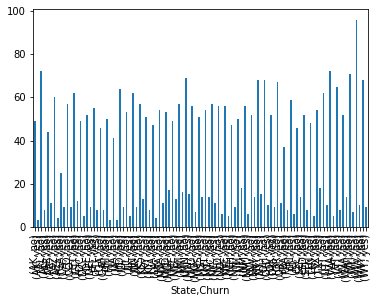

In [12]:
# TO DO - multiple bar to see churn and non-churn across different states





df.groupby('State')['Churn'].value_counts().plot(kind='bar')

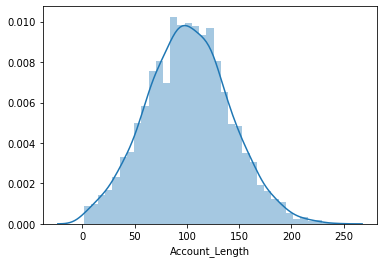

In [13]:
# Distribution of "Account_Length" feature

# plt.hist(df['Account_Length'], bins=25)
sns.distplot(df['Account_Length'])
plt.show()

In [14]:
# Insights
    # Illustrates the duration that a customer stays with the provider
    # is normally distribution (as what to expect in the real world)

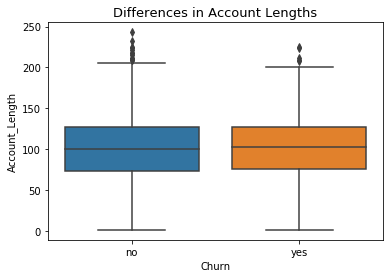

In [15]:
# Examining differences between churners and non-churners
# w.r.t their account lengths

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df)

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [16]:
# There are no notable differences in account lengths for
# churners v/s non-churners

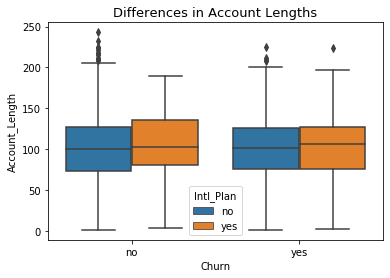

In [17]:
# Checking if having an international plan matters

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df,
            hue='Intl_Plan')

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [18]:
# Insights
    # No noticeable difference amoung customers with or
    # without an international plan

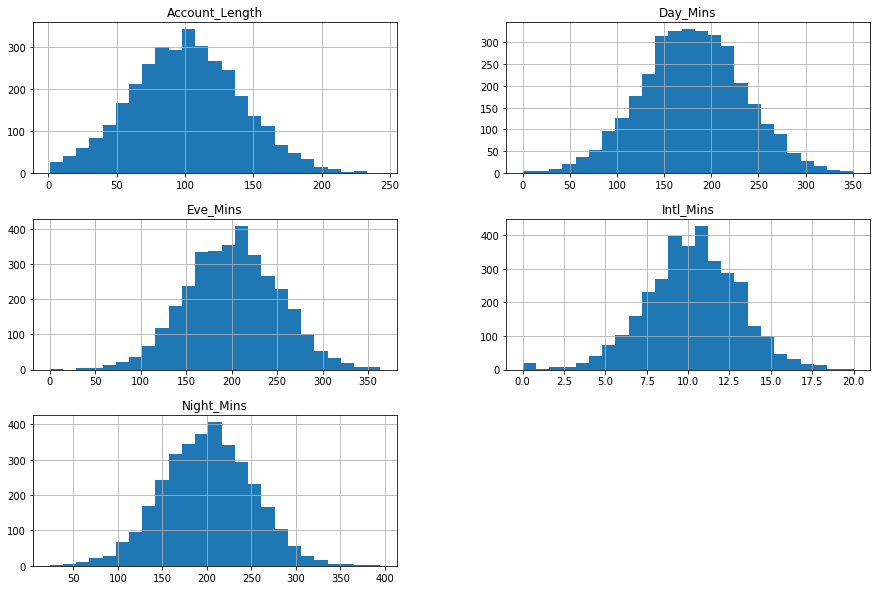

In [19]:
# Checking distribution of select features

df[['Account_Length', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']].hist(bins=25, figsize=(15,10))
plt.show()

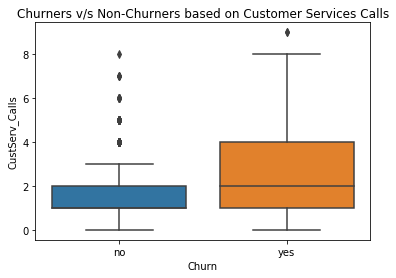

In [20]:
# Churn difference based on Customer Service Calls placed

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df)

plt.title('Churners v/s Non-Churners based on Customer Services Calls')
plt.show()

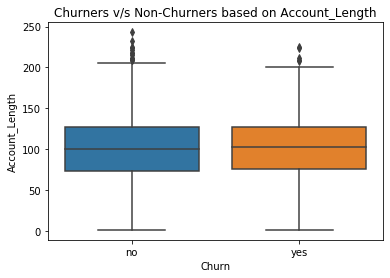

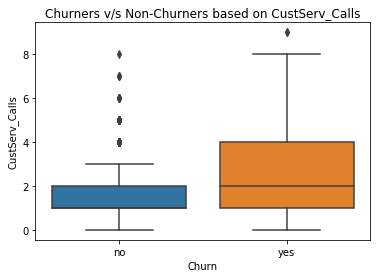

In [21]:
features = ['Account_Length', 'CustServ_Calls'] 

for feature in features:
    fig, axs = plt.subplots()
    fig = sns.boxplot(x = 'Churn',
                      y = feature,
                      data = df)
    plt.title('Churners v/s Non-Churners based on {}'.format(feature))

plt.show()

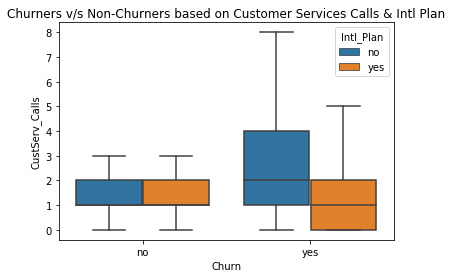

In [22]:
# Churn difference based on Customer Service Calls placed
# and being on an International Plan

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym='', # removing outliers from plot
            hue='Intl_Plan') 

plt.title('Churners v/s Non-Churners based on Customer Services Calls & Intl Plan')
plt.show()

In [23]:
# Insights:
    # Customers who leave more customer service calls churn more
    # unless they also have an international plan

---

## Data Preprocessing

- Check missing values
- Checking distribution of features
- Encoding Categorical variables
- Feature Scaling via Standardization
- Feature Selection and Engineering

### Missing Values

In [24]:
# Missing values check

df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [25]:
# Examining data types 

df.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [26]:
# Forming list of columns that are numerical and categorical

features_num = df.select_dtypes(include=['int64', 'float64']).columns
features_cat = df.select_dtypes(include=['object']).columns

In [27]:
print(features_num)
print('-'*80)
print(features_cat)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls',
       'Intl_Charge', 'Area_Code'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['Churn', 'Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], dtype='object')


### Split df into features and target

In [28]:
# Splitting Features and target

# X = df.loc[:, df.columns != 'Churn']
X = df.drop(['Phone', 'Area_Code', 'Churn'], axis=1)
print(X.shape)
y = df['Churn']
y.shape

(3333, 18)


(3333,)

In [29]:
# Instantiate Label Encoder for "Churn"

le = LabelEncoder()

In [30]:
y = le.fit_transform(y)

In [31]:
y

array([0, 0, 0, ..., 0, 0, 0])

### Train-Test Split

In [32]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2499, 18) (834, 18) (2499,) (834,)


### Encoding Categorical Variables

In [33]:
# Instantiate Ordinal Encoder

oe = OrdinalEncoder()

In [34]:
# Encoding "VmailPlan"

ct = make_column_transformer(
    (oe, ['Vmail_Plan'])
    ,remainder='passthrough')

In [35]:
ct.fit_transform(X_train)

array([[1.0, 108, 42, ..., 5, 3.67, 'MD'],
       [0.0, 41, 0, ..., 2, 2.94, 'NM'],
       [1.0, 91, 44, ..., 3, 2.46, 'WI'],
       ...,
       [1.0, 119, 16, ..., 2, 2.08, 'MA'],
       [0.0, 84, 0, ..., 6, 3.78, 'VA'],
       [0.0, 138, 0, ..., 8, 3.27, 'UT']], dtype=object)

In [36]:
# Instantiate OHE

ohe = OneHotEncoder()

In [37]:
# One Hot Encode "State"

ct = make_column_transformer(
    (oe, ['Vmail_Plan']),
    (ohe, ['State'])
    ,remainder='passthrough')

### Feature Scaling

In [38]:
# Instantiate StandardScaler

ss = StandardScaler()

In [39]:
# Standardize features "Intl_Calls", "Night_Mins"

ct = make_column_transformer(
    (oe, ['Vmail_Plan']),
    (ohe, ['State']),
    (ss, ['Intl_Calls', 'Night_Mins'])
    ,remainder='passthrough')

### Feature Selection

In [40]:
# Dropping features:
    # that offer no predictive power
    # highly correlated with other features
        # and provide no additional information


In [41]:
# Dropping "Area_Code" and "Phone"

    # Moving this part to before X and y and train-test-split is done

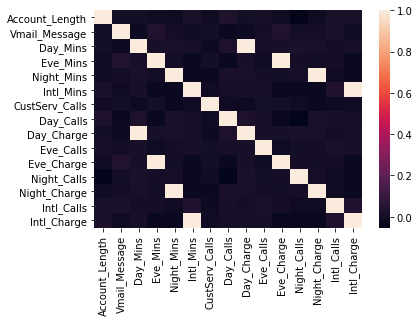

In [42]:
# Checking correlation

sns.heatmap(X_train.corr())

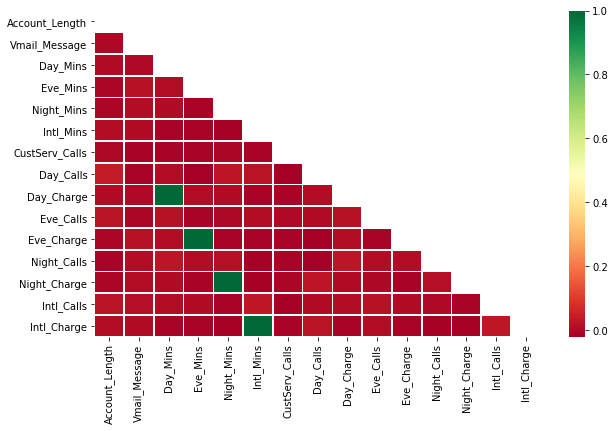

In [43]:
plt.figure(figsize=(10,6))
mask = np.zeros_like(X_train.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(X.corr(), mask= mask, linewidth=0.7, cmap='RdYlGn') 
plt.show()

In [44]:
# Insights:
    # Following features are highly correlated
        # Day_Mins & Day_Charge
        # Eve_Mins & Eve_Charge
        # Night_Mins & Night_Charge
        # Intl_Mins & Intl_Charge

In [45]:
# Will have to move this on top as well 
# where we removed Area_Code and Phone.









## Feature Engineering

In [46]:
# Total Minutes = Day_Mins + Eve_Mins + Night_Mins + Intl_Mins
# or, Ratio b/w Ratio and Charge